# Objective
- Perform EDA on a couple of features that intuitively seem predictive
- To give more insight into the data to allow us to perform better feature engineering

# In Summary:

### Bias concerns
- One point in DAYS_EMPLOYED that > 55,000 applicants supposedly have
	- 365243
	- and the next largest number value is 0
- Apparent from income, and credit feature that we need to keep in mind that if the screening process (that created this data) changes we would need to retrain the model

### Outliers
- Income, and DAYS_EMPLOYED

### Odd distributions
- Income is also very contentrated around regular interval levels
	- Makes sense
	- But something we should keep in mind
		- For example if we want to binning on these, maybe going with equal height bins don't make sense
		- Instead could use a simple clustering algorthm along the 1 dimension to get our bins
			- Or maybe just realize the pattern and set bin widths accordingly

### Potential features
- Relation between income and credit
	- but not as effective as would have expected
- Longer the applicant has been at they're current job the better
	- Also not a huge feature though

### Takeaways
- In order to build a model that performs well on this data we're probably going to need some mroe creative features
	- Because all the easy ones seem to have been already used in order to screen the applicants in the 1st place

### Setup

In [18]:
import pandas as pd
from plotnine import *
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.listdir("./")

['.DS_Store',
 'mmf_env',
 'resources',
 'slides',
 '2017',
 '.gitignore',
 '.gitattributes',
 '.ipynb_checkpoints',
 '.git',
 'credit_risk',
 '.idea']

In [25]:
import matplotlib.pyplot as plt

In [5]:
DATA_DIR = "./credit_risk/data"

os.listdir(DATA_DIR)

['application_test.csv',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 '~$HomeCredit_columns_description.xlsx',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.xlsx',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [6]:
app = pd.read_csv(DATA_DIR + "/application_train.csv")
prev_app = pd.read_csv(DATA_DIR + "/previous_application.csv")
cc_balance = pd.read_csv(DATA_DIR + "/credit_card_balance.csv")
install_payments = pd.read_csv(DATA_DIR + "/installments_payments.csv")

In [14]:
prev_app.columns, app.columns

(Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
        'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
        'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
        'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
        'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
        'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
        'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
        'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
        'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
        'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
        'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
        'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
        'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
       dtype='object'),
 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG

In [7]:
sel_cols = ["AMT_CREDIT", "AMT_ANNUITY", "NAME_CONTRACT_TYPE", "SK_ID_CURR"]
app = app[sel_cols + ["DAYS_EMPLOYED", "AMT_INCOME_TOTAL", "TARGET"]]
prev_app = prev_app[sel_cols + ["SK_ID_PREV"]]

"EDA is an iterative cycle. You:
- Generate questions about your data.
- Search for answers by visualising, transforming, and modelling your data.
- Use what you learn to refine your questions and/or generate new questions."
- https://r4ds.had.co.nz/exploratory-data-analysis.html

### General overview of application data

In [28]:
app.head()

,AMT_CREDIT,AMT_ANNUITY,NAME_CONTRACT_TYPE,SK_ID_CURR,DAYS_EMPLOYED,AMT_INCOME_TOTAL,TARGET
0,406597.5,24700.5,Cash loans,100002,-637,202500.0,1
1,1293502.5,35698.5,Cash loans,100003,-1188,270000.0,0
2,135000.0,6750.0,Revolving loans,100004,-225,67500.0,0
3,312682.5,29686.5,Cash loans,100006,-3039,135000.0,0
4,513000.0,21865.5,Cash loans,100007,-3038,121500.0,0


In [10]:
app.describe()

,AMT_CREDIT,AMT_ANNUITY,SK_ID_CURR,DAYS_EMPLOYED,AMT_INCOME_TOTAL,TARGET
count,3.075110e+05,307499.000000,307511.000000,307511.000000,3.075110e+05,307511.000000
mean,5.990260e+05,27108.573909,278180.518577,63815.045904,1.687979e+05,0.080729
std,4.024908e+05,14493.737315,102790.175348,141275.766519,2.371231e+05,0.272419
min,4.500000e+04,1615.500000,100002.000000,-17912.000000,2.565000e+04,0.000000
25%,2.700000e+05,16524.000000,189145.500000,-2760.000000,1.125000e+05,0.000000
50%,5.135310e+05,24903.000000,278202.000000,-1213.000000,1.471500e+05,0.000000
75%,8.086500e+05,34596.000000,367142.500000,-289.000000,2.025000e+05,0.000000
max,4.050000e+06,258025.500000,456255.000000,365243.000000,1.170000e+08,1.000000


In [13]:
app.dtypes

AMT_CREDIT            float64
AMT_ANNUITY           float64
NAME_CONTRACT_TYPE     object
SK_ID_CURR              int64
DAYS_EMPLOYED           int64
AMT_INCOME_TOTAL      float64
TARGET                  int64
dtype: object

In [21]:
app.isnull().sum(axis=0)

AMT_CREDIT             0
AMT_ANNUITY           12
NAME_CONTRACT_TYPE     0
SK_ID_CURR             0
DAYS_EMPLOYED          0
AMT_INCOME_TOTAL       0
TARGET                 0
dtype: int64

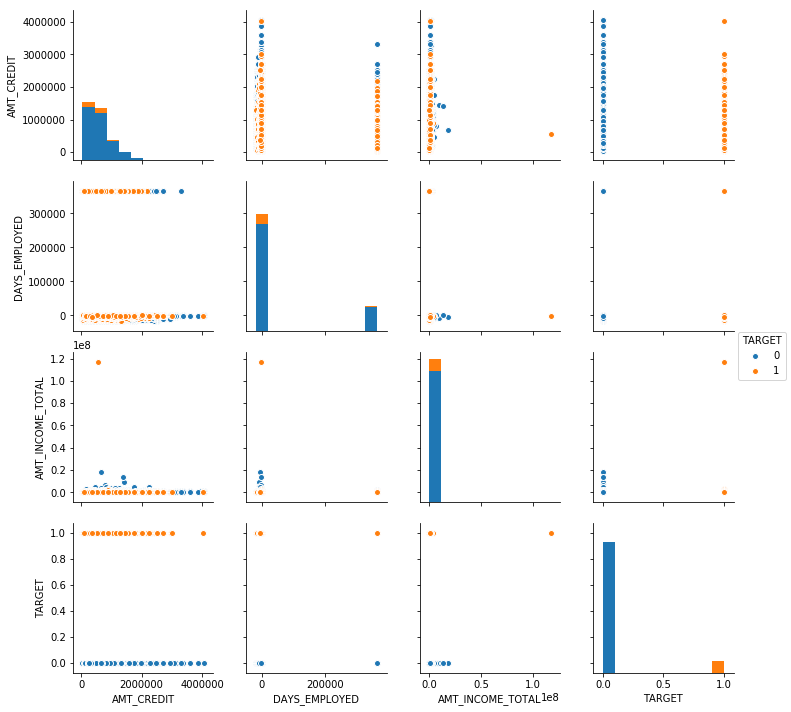

In [38]:
sns.pairplot(app[[c for c in app.columns if c != "AMT_ANNUITY" and c != "SK_ID_CURR"]], hue="TARGET")


- Days employed seems very bimodal, weirdly so
- income and credit highly right skewed

### Days Employed

In [66]:
app = app.assign(target = app.TARGET.astype(str),
                  days_employed_gt_100g = app.DAYS_EMPLOYED > 100000)

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


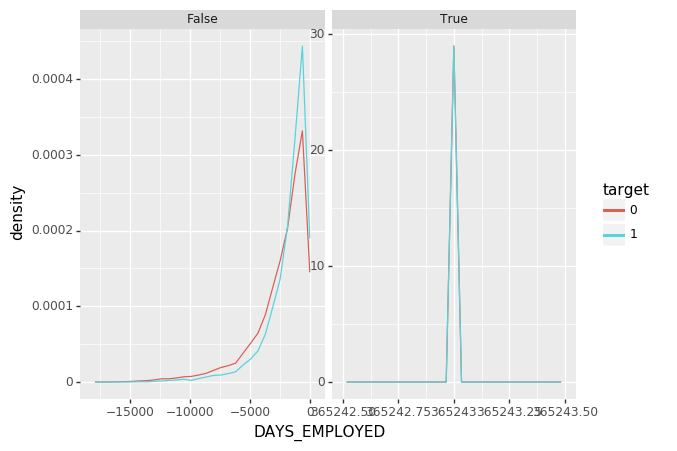

<ggplot: (-9223372029279067974)>

In [62]:
ggplot(app, 
       aes("DAYS_EMPLOYED", y="..density..")) +\
    geom_freqpoly(aes(color="target"),
                  stat=stat_bin(bins=30)) +\
    facet_wrap("~ days_employed_gt_100g", scales="free")

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


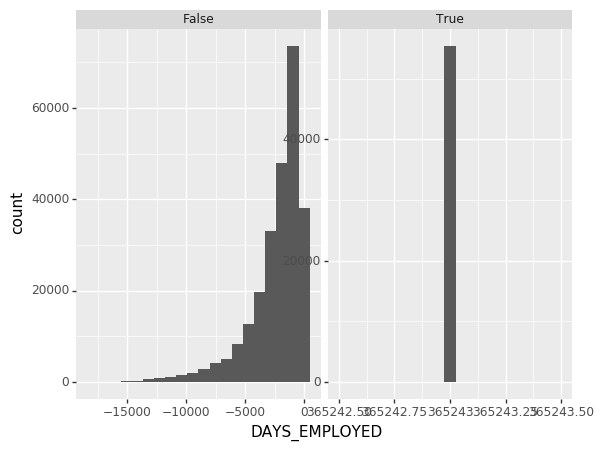

<ggplot: (-9223372029291649059)>

In [61]:
ggplot(app, 
       aes("DAYS_EMPLOYED")) +\
    geom_histogram(stat=stat_bin(bins=20)) +\
    facet_wrap("~ days_employed_gt_100g", scales="free")

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


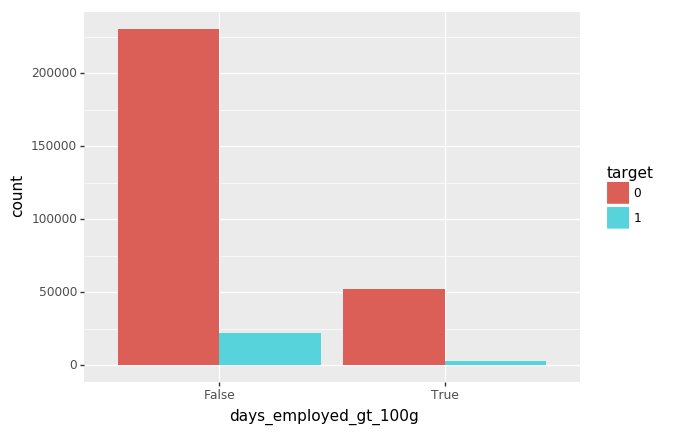

<ggplot: (-9223372029279451767)>

In [45]:
ggplot(app, 
       aes("days_employed_gt_100g")) +\
    geom_bar(aes(fill="target"), position="dodge") 


In [54]:
(app
 .groupby("days_employed_gt_100g")
 .agg({"DAYS_EMPLOYED": ["mean", "min","max", "size"],
       "TARGET": "mean"}))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="4" halign="left">DAYS_EMPLOYED</th>
      <th>TARGET</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>min</th>
      <th>max</th>
      <th>size</th>
      <th>mean</th>
    </tr>
    <tr>
      <th>days_employed_gt_100g</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>False</th>
      <td>-2384.169325</td>
      <td>-17912</td>
      <td>0</td>
      <td>252137</td>
      <td>0.086600</td>
    </tr>
    <tr>
      <th>True</th>
      <td>365243.000000</td>
      <td>365243</td>
      <td>365243</td>
      <td>55374</td>
      <td>0.053996</td>
    </tr>
  </tbody>
</table>
</div>

In [58]:
(app[app.DAYS_EMPLOYED > 100000]
    [["SK_ID_CURR"]].drop_duplicates().shape)

(55374, 1)

obviously something off here.

may want to disclude this feature.

In [84]:
app[app.DAYS_EMPLOYED < 100000].describe() - app[app.DAYS_EMPLOYED > 100000].describe()

,AMT_CREDIT,AMT_ANNUITY,SK_ID_CURR,DAYS_EMPLOYED,AMT_INCOME_TOTAL,TARGET
count,196763.000000,196751.000000,196763.000000,196763.000000,1.967630e+05,196763.000000
mean,68708.543616,3908.021966,-365.829321,-367627.169325,3.951845e+04,0.032603
std,28028.094520,1339.379866,141.074604,2338.360162,1.821907e+05,0.055235
min,0.000000,364.500000,-9.000000,-383155.000000,0.000000e+00,0.000000
25%,23269.500000,2569.500000,-587.250000,-368418.000000,2.250000e+04,0.000000
50%,63445.500000,4059.000000,-937.500000,-366891.000000,4.050000e+04,0.000000
75%,74034.000000,5674.500000,112.000000,-366010.000000,4.500000e+04,0.000000
max,737838.000000,33025.500000,3.000000,-365243.000000,1.147500e+08,0.000000


In [69]:
app_melted = app.melt(value_vars=["AMT_INCOME_TOTAL", "AMT_CREDIT"], 
                 id_vars=["target", "DAYS_EMPLOYED"])
app_melted.head()

,target,DAYS_EMPLOYED,variable,value
0,1,-637,AMT_INCOME_TOTAL,202500.0
1,0,-1188,AMT_INCOME_TOTAL,270000.0
2,0,-225,AMT_INCOME_TOTAL,67500.0
3,0,-3039,AMT_INCOME_TOTAL,135000.0
4,0,-3038,AMT_INCOME_TOTAL,121500.0


/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


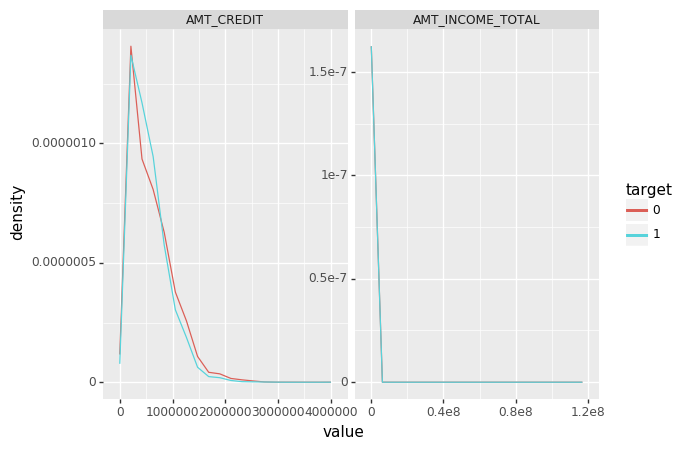

<ggplot: (-9223372029315889180)>

In [71]:
(ggplot(app_melted, 
        aes("value", y="..density..", color="target")) +
 geom_freqpoly(stat=stat_bin(bins=20)) +
 facet_wrap("~variable", scales="free")) 

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 134'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


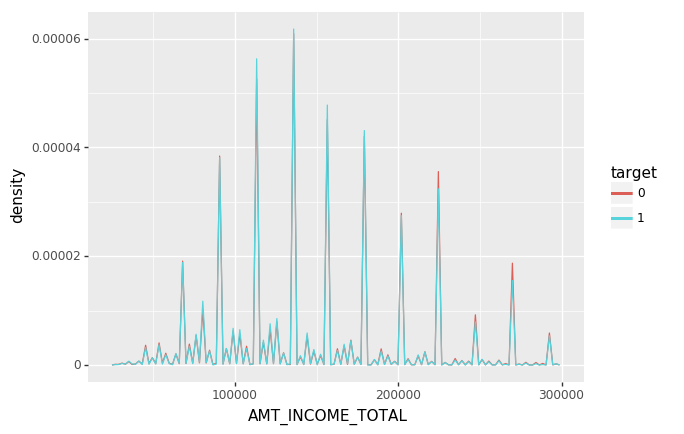

<ggplot: (7602146445)>

In [72]:
(ggplot(app[app.AMT_INCOME_TOTAL < 300000], 
       aes("AMT_INCOME_TOTAL", y="..density..", color="target")) +
 geom_freqpoly())

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


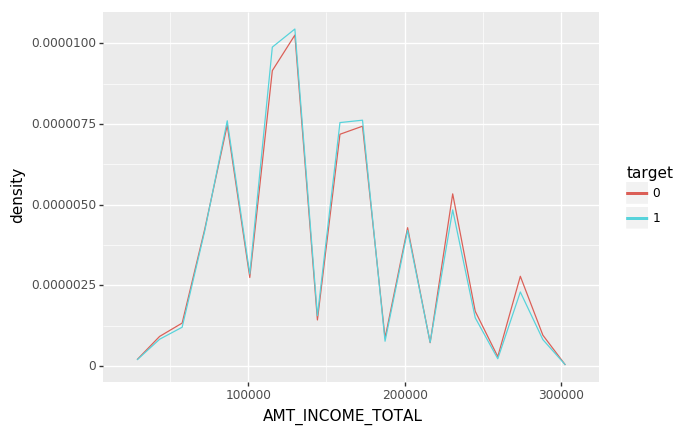

<ggplot: (-9223372029252629297)>

In [73]:
(ggplot(app[app.AMT_INCOME_TOTAL < 300000], 
       aes("AMT_INCOME_TOTAL", y="..density..", color="target")) +
 geom_freqpoly(stat=stat_bin(bins=20)))

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


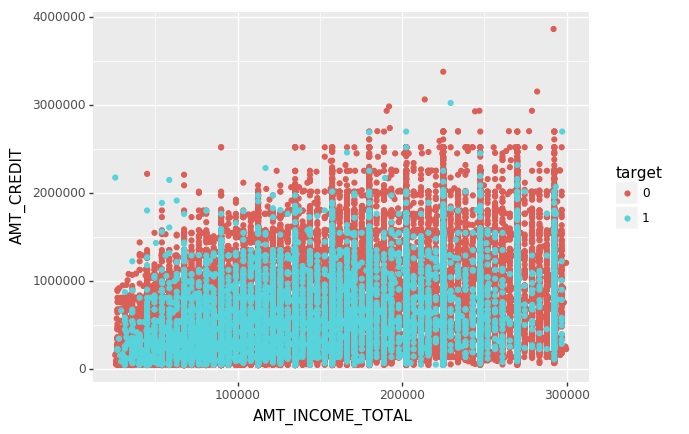

<ggplot: (-9223372029252615918)>

In [74]:
(ggplot(app[app.AMT_INCOME_TOTAL < 300000], 
       aes("AMT_INCOME_TOTAL", y="AMT_CREDIT", color="target")) +
 geom_point())

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


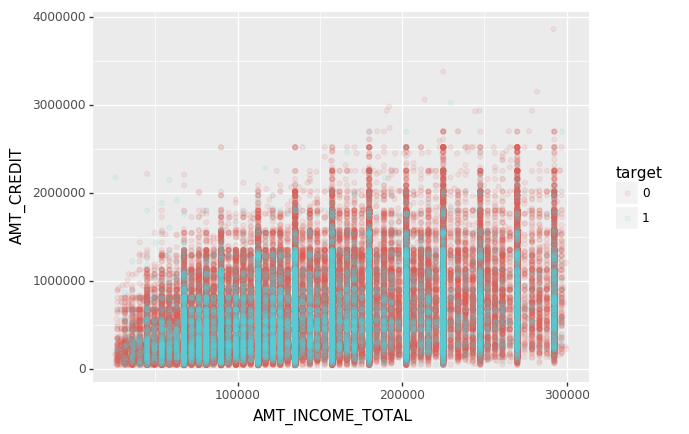

<ggplot: (7612175196)>

In [77]:
(ggplot(app[app.AMT_INCOME_TOTAL < 300000], 
       aes("AMT_INCOME_TOTAL", y="AMT_CREDIT", color="target")) +
 geom_point(alpha=.1))

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


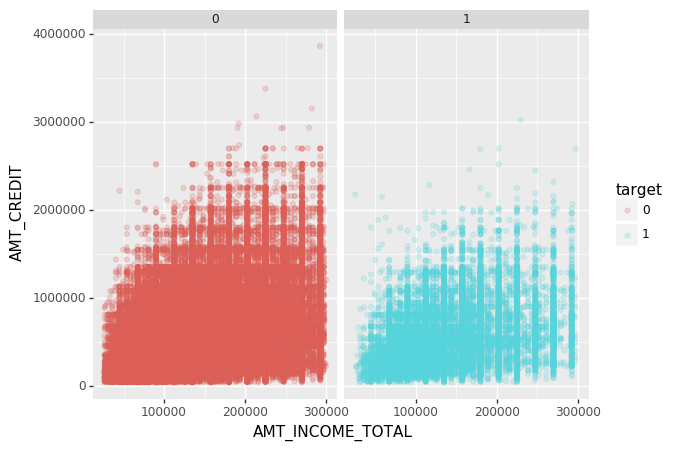

<ggplot: (7642168703)>

In [80]:
(ggplot(app[app.AMT_INCOME_TOTAL < 300000], 
       aes("AMT_INCOME_TOTAL", y="AMT_CREDIT", color="target")) +
 geom_point(alpha=.2) +
 facet_wrap("~target"))

In [97]:
(app.assign(inc_gt_200g = app.AMT_INCOME_TOTAL > 200000,
           cred_gt_50g = app.AMT_CREDIT > 50000)
 .groupby(["inc_gt_200g", "cred_gt_50g"])
 .agg({"TARGET": ["mean", "size"]}))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">TARGET</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>size</th>
    </tr>
    <tr>
      <th>inc_gt_200g</th>
      <th>cred_gt_50g</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">False</th>
      <th>False</th>
      <td>0.041199</td>
      <td>534</td>
    </tr>
    <tr>
      <th>True</th>
      <td>0.084583</td>
      <td>219062</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">True</th>
      <th>False</th>
      <td>0.037037</td>
      <td>27</td>
    </tr>
    <tr>
      <th>True</th>
      <td>0.071375</td>
      <td>87888</td>
    </tr>
  </tbody>
</table>
</div>

27 isn't really enough to be confident in

In [100]:
(app.assign(inc_gt_200g = app.AMT_INCOME_TOTAL > 200000,
           cred_gt_100g = app.AMT_CREDIT > 100000)
 .groupby(["inc_gt_200g", "cred_gt_100g"])
 .agg({"TARGET": ["mean", "size"]}))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">TARGET</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>size</th>
    </tr>
    <tr>
      <th>inc_gt_200g</th>
      <th>cred_gt_100g</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">False</th>
      <th>False</th>
      <td>0.053113</td>
      <td>5686</td>
    </tr>
    <tr>
      <th>True</th>
      <td>0.085312</td>
      <td>213910</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">True</th>
      <th>False</th>
      <td>0.091195</td>
      <td>318</td>
    </tr>
    <tr>
      <th>True</th>
      <td>0.071292</td>
      <td>87597</td>
    </tr>
  </tbody>
</table>
</div>

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


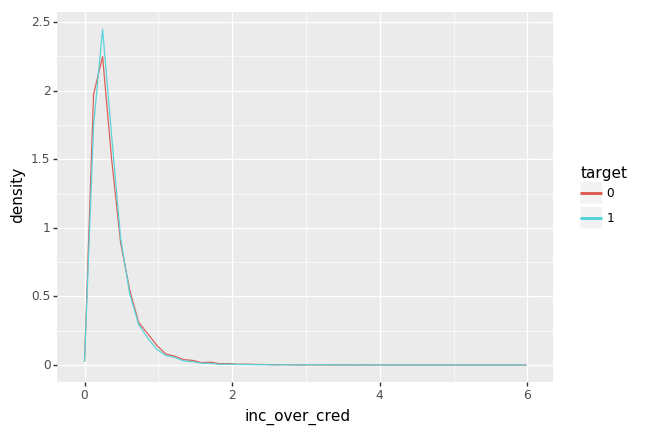

<ggplot: (-9223372029242706684)>

In [103]:
(ggplot(app[app.AMT_INCOME_TOTAL < 300000].assign(inc_over_cred = app.AMT_INCOME_TOTAL / app.AMT_CREDIT),
       aes("inc_over_cred", y="..density..", color="target")) +
 geom_freqpoly(stat=stat_bin(bins=50)))

/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


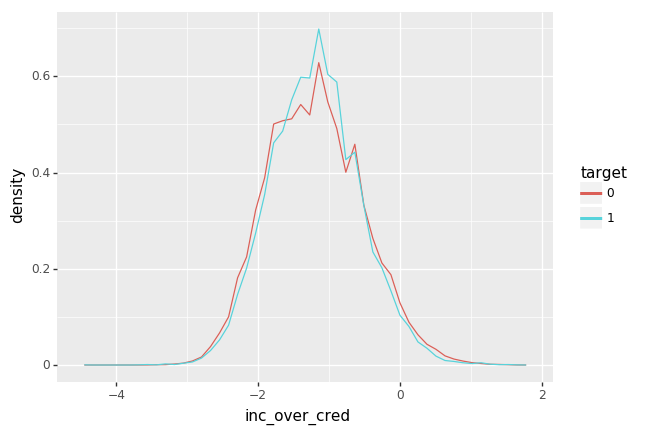

<ggplot: (-9223372029312894106)>

In [106]:
import numpy as np
(ggplot(app[app.AMT_INCOME_TOTAL < 300000].assign(inc_over_cred = np.log(app.AMT_INCOME_TOTAL / app.AMT_CREDIT)),
       aes("inc_over_cred", y="..density..", color="target")) +
 geom_freqpoly(stat=stat_bin(bins=50)))

##### Why isn't this feature stronger?
- Likely because of they're screening method now
- This data didn't come from handing out loans to everyone, they screened them first
- Notice why this in important to keep in mind
	- It suggests that this algorithm that we develop based on this data is going be reliant on their current screening process
	- If this process were to change, or our model were to be intended to replace it. It likely would not perform effectively
		- Because of instances like this above

### Look into more relations with DAYS_EMPLOYED

/Users/bryparker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


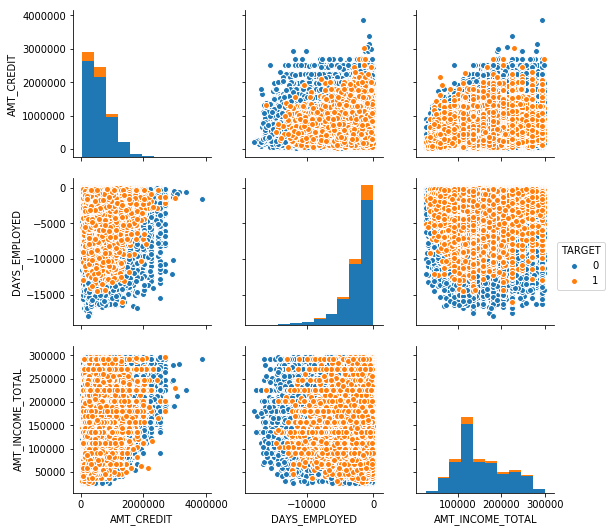

In [91]:
sns.pairplot(app[app.DAYS_EMPLOYED < 100000][app.AMT_INCOME_TOTAL < 300000], 
             hue="TARGET", vars=["AMT_CREDIT", "DAYS_EMPLOYED", "AMT_INCOME_TOTAL"])

In [93]:
melted_app_sub = (app
                  [app.DAYS_EMPLOYED < 100000][app.AMT_INCOME_TOTAL < 300000]
                  .melt(value_vars=["AMT_INCOME_TOTAL", "AMT_CREDIT"], 
                 id_vars=["target", "DAYS_EMPLOYED"]))

/Users/bryparker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Users/bryparker/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()


/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/bryparker/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


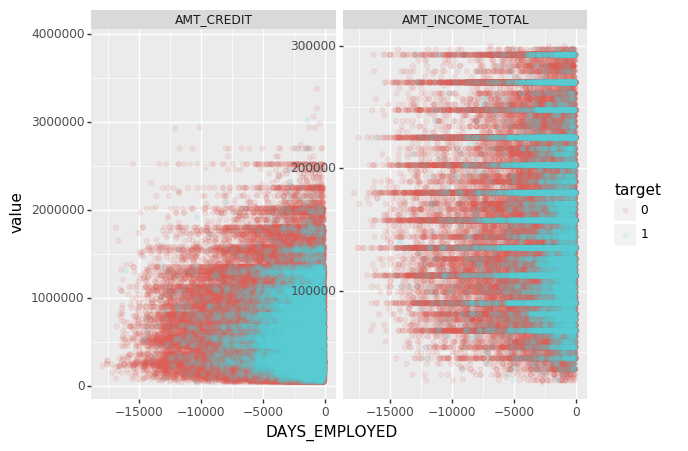

<ggplot: (-9223372029234987488)>

In [95]:
(ggplot(melted_app_sub, 
       aes("DAYS_EMPLOYED", y="value", color="target")) +
 geom_point(alpha=.1) +
 facet_wrap("~ variable", scales="free"))